# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$TWITTER DATA ANALYSIS

## 1. Download data set 

In [1]:
!wget --header="Host: thinknook.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/" --header="Cookie: __utma=222372318.65937043.1571391263.1571391263.1571391263.1; __utmc=222372318; __utmz=222372318.1571391263.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utmt=1; __utmb=222372318.2.10.1571391263" --header="Connection: keep-alive" "http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip" -O "Sentiment-Analysis-Dataset.zip" -c

--2019-10-19 17:26:37--  http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip
Resolving thinknook.com (thinknook.com)... 208.109.47.128
Connecting to thinknook.com (thinknook.com)|208.109.47.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56427677 (54M) [application/zip]
Saving to: ‘Sentiment-Analysis-Dataset.zip’

Sentiment-Analysis- 100%[===================>]  53.81M  13.3MB/s    in 6.3s    

2019-10-19 17:26:44 (8.59 MB/s) - ‘Sentiment-Analysis-Dataset.zip’ saved [56427677/56427677]



In [2]:
!unzip Sentiment-Analysis-Dataset.zip 

Archive:  Sentiment-Analysis-Dataset.zip
  inflating: Sentiment Analysis Dataset.csv  


## 2.Import packages

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os



## 3.Read data

In [4]:
twitter_data=pd.read_csv('Sentiment Analysis Dataset.csv',error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [5]:
twitter_data

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
5,6,0,Sentiment140,or i just worry too much?
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...
8,9,1,Sentiment140,handed in my uniform today . i miss you ...
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)


In [6]:
print(twitter_data['SentimentText'].values[0])
print("="*50)
print(twitter_data['SentimentText'].values[15])
print("="*50)
print(twitter_data['SentimentText'].values[100])
print("="*50)
print(twitter_data['SentimentText'].values[200])
print("="*50)
print(twitter_data['SentimentText'].values[10000])
print("="*50)

                     is so sad for my APL friend.............
    &lt;-------- This is the way i feel right now...
  no pavel tonight &lt;Tigersfan &gt;
 @georgediaz #Magic ..thinking less than 50 % chance Hedo stays in Orlando. He's gonna go for the $$. They all do. Can't blame him though.
&quot;I feel like I'm playing Scrabble of... royalty.&quot; -@Bryan_Roush, on my bitchin' board 


### Stopwords
- we are not taking "Not,no,don't, etc" ind of words as they can be helpful here.

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren']

### Preprocessing the dataset.
- Repace all the abbrevation with full words.
- Remove twitter handles as they contain very less  information.

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub("\%", "", phrase)
    phrase = re.sub("\.", "", phrase)
    phrase = re.sub("\&", "", phrase)
    phrase=" ".join(filter(lambda x:x[0]!='@', phrase.split()))
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    phrase = " ".join(filter(lambda x:x[0]!='@', phrase.split()))
    phrase = ' '.join(e for e in phrase.split() if e not in stopwords)
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    
    return phrase

In [9]:
from tqdm import tqdm
preprocessed_sentiment = []
# tqdm is for printing the status bar
for sentance in tqdm(twitter_data['SentimentText'].values):
    sent = decontracted(sentance)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_sentiment.append(sent.lower().strip())


100%|██████████| 1578612/1578612 [01:34<00:00, 16741.22it/s]


### Remove the words whose size is <2 and >15 as they does not contain much information.

In [0]:

twitter_data['processed_SentimentText']=preprocessed_sentiment

twitter_data['processed_SentimentText']= twitter_data['processed_SentimentText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
twitter_data['processed_SentimentText']= twitter_data['processed_SentimentText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<15]))

In [11]:
twitter_data

,ItemID,Sentiment,SentimentSource,SentimentText,processed_SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...,sad apl friend
1,2,0,Sentiment140,I missed the New Moon trail...,missed new moon trailer
2,3,1,Sentiment140,omg its already 7:30 :O,omg already
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry dentist since suposed ge...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,think cheating
5,6,0,Sentiment140,or i just worry too much?,worry much
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,chillin
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow tonight
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,handed uniform today miss already
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),hmmmm wonder number


In [12]:
print(twitter_data['SentimentText'].values[1578598])
print("="*50)
print(twitter_data['SentimentText'].values[1578508])
print("="*50)
print(twitter_data['SentimentText'].values[1578474])
print("="*50)
print(twitter_data['SentimentText'].values[1989])
print("="*50)
print(twitter_data['SentimentText'].values[1295])
print("="*50)

ZZ Top â€“ I Thank You ...@hawaiibuzz   .....Thanks for your music and for your ear(s) ...ALL !!!! Have a fab... â™« http://blip.fm/~7qir4
YYYEEEEAAAAAHHHHHHHH, RED WINGS FTW!!!!! 5-0, BABY!!!!!   
yup its going to be @TaqiyyaLuvLa @10marion @officialTila @Tyrese4Real @Willie_Day26 @souljaboytellem and many more tonight,fun...  lol jk
 Im crushed, How could i have been so stupid?... ~!$@M@NTH@ !~
 http://img207.imageshack.us/my.php?image=wpcl10670s.jpg her songs are so perfect.


In [13]:
print(twitter_data['processed_SentimentText'].values[1578598])
print("="*50)
print(twitter_data['processed_SentimentText'].values[1578508])
print("="*50)
print(twitter_data['processed_SentimentText'].values[1578474])
print("="*50)
print(twitter_data['processed_SentimentText'].values[1989])
print("="*50)
print(twitter_data['processed_SentimentText'].values[1295])
print("="*50)

top thank you thanks music ear all have fab http blipfm 7qir4
red wings ftw baby
yup going many tonight fun lol
crushed how could stupid nth
http myphp image wpcl10670sjpg songs perfect


### Data analysis and EDA

In [0]:
len(twitter_data['processed_SentimentText'])

1578612

In [0]:
word_list=[]
for sentence in tqdm(range(len(twitter_data['processed_SentimentText']))):
  l=twitter_data['processed_SentimentText'].values[sentence].split()
  for words in l:
    word_list.append(words)

100%|██████████| 1578612/1578612 [00:09<00:00, 170984.88it/s]


In [0]:
len(word_list)

11351828

In [0]:
w=set(word_list)

In [0]:
len(w)

425948

### There are 11351828 words in total and 425948 are unique words.

#### Counting the frequency of each word

Ther are large no of words which requires large computation power so we can use 10000 words only 

In [0]:
from tqdm import tqdm_notebook
D={}
for words in tqdm_notebook(w):
  c=0
  for i in word_list[:10000]:
    if(words==i):
      c=c+1
  D[words]=c


you can see most word count is zero because we counted only 10000 words.

In [0]:
D

{'dollyrocker': 0,
 'choppy': 0,
 'nxryqf': 0,
 'nyabwire': 0,
 'isort': 0,
 'snag': 0,
 'divention': 0,
 '6gaop': 0,
 'botar': 0,
 'latelydoing': 0,
 'searchbut': 0,
 'knowclowns': 0,
 'echooooo': 0,
 'sloss': 0,
 'wooha': 0,
 'gymbout': 0,
 'abowt': 0,
 'serveraufbau': 0,
 'talkim': 0,
 'hostility': 0,
 'laird': 0,
 'finalsbig': 0,
 '6q85t': 0,
 'berrie': 0,
 'jayem': 0,
 'nhn': 0,
 '7j1ww': 0,
 'beod5': 0,
 'spanner': 0,
 'ooonly': 0,
 'lindaenever': 0,
 'atualizado': 0,
 'tonightnot': 0,
 '5mins': 0,
 'zoila': 0,
 'dsims': 0,
 'myklroventine': 0,
 'anwar': 0,
 'revisee': 0,
 'nonanimal': 0,
 'northhead': 0,
 'fmgfj': 0,
 'againthinkig': 0,
 'mywireless': 0,
 'escaladeit': 0,
 'stinkpad': 0,
 'thxquot': 0,
 'themoh': 0,
 'xce46': 0,
 'drscofield': 0,
 'biologyyyyy': 0,
 'welcomein': 0,
 'north': 2,
 'cookiezmama': 0,
 'klingon': 0,
 'ocaml': 0,
 'daven': 0,
 'socialtees': 0,
 'sorryat': 0,
 'upap': 0,
 'jom': 0,
 'macrumors': 0,
 'infectedd': 0,
 'mrnu': 0,
 'glenoaks': 0,
 'gggrrrr

In [0]:
sorted_d = sorted(D.items(), key=lambda kv: kv[1],reverse=True)

In [0]:
sorted_d

[('not', 234),
 ('http', 157),
 ('day', 89),
 ('get', 83),
 ('quot', 77),
 ('like', 60),
 ('got', 53),
 ('today', 51),
 ('amp', 50),
 ('good', 50),
 ('back', 48),
 ('going', 47),
 ('work', 47),
 ('one', 46),
 ('night', 46),
 ('want', 45),
 ('know', 41),
 ('love', 40),
 ('much', 37),
 ('think', 36),
 ('bitly', 36),
 ('new', 35),
 ('well', 35),
 ('time', 34),
 ('sad', 34),
 ('miss', 34),
 ('still', 33),
 ('lol', 33),
 ('feel', 32),
 ('trim', 32),
 ('see', 32),
 ('bad', 31),
 ('really', 31),
 ('tomorrow', 30),
 ('twitter', 30),
 ('the', 29),
 ('days', 29),
 ('happy', 29),
 ('great', 28),
 ('home', 28),
 ('dont', 27),
 ('make', 26),
 ('getting', 26),
 ('gonna', 26),
 ('would', 26),
 ('hate', 25),
 ('last', 25),
 ('need', 23),
 ('even', 22),
 ('tonight', 22),
 ('guess', 22),
 ('another', 22),
 ('better', 21),
 ('bed', 21),
 ('fuck', 21),
 ('school', 21),
 ('feeling', 21),
 ('you', 21),
 ('someone', 20),
 ('wanna', 20),
 ('right', 20),
 ('hope', 20),
 ('thanks', 19),
 ('come', 19),
 ('wait',

### These are the mostly occuring words in tweets
 ('not', 234)<br>
 ('http', 157)<br>
 ('day', 89)<br>
 ('get', 83)<br>
 ('quot', 77)<br>
 ('like', 60)<br>

### Finding no of tweets in both negative and positive sentiments

In [0]:
neg_data=twitter_data.loc[twitter_data['Sentiment']==1]

In [0]:
neg_data

,ItemID,Sentiment,SentimentSource,SentimentText,processed_SentimentText
2,3,1,Sentiment140,omg its already 7:30 :O,omg already
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,chillin
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,handed uniform today miss already
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),hmmmm wonder number
11,12,1,Sentiment140,thanks to all the haters up in my face a...,thanks haters face day 112 102
17,18,1,Sentiment140,Feeling strangely fine. Now I'm gonna go l...,feeling strangely fine now gonna listen semiso...
22,23,1,Sentiment140,You're the only one who can see this cause...,you one see cause one else following pretty aw...
28,29,1,Sentiment140,"goodbye exams, HELLO ALCOHOL TONIGHT",goodbye exams hello alcohol tonight
38,39,1,Sentiment140,uploading pictures on friendster,uploading pictures friendster
41,42,1,Sentiment140,(: !!!!!! - so i wrote something last week. ...,wrote something last week got call someone new...


In [0]:
neg_data.describe()

,ItemID,Sentiment
count,7.901770e+05,790177.0
mean,7.382949e+05,1.0
std,4.564029e+05,0.0
min,3.000000e+00,1.0
25%,3.393620e+05,1.0
50%,7.065250e+05,1.0
75%,1.135595e+06,1.0
max,1.578624e+06,1.0


In [0]:
pos_data=twitter_data.loc[twitter_data['Sentiment']==0]

In [0]:
pos_data

,ItemID,Sentiment,SentimentSource,SentimentText,processed_SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...,sad apl friend
1,2,0,Sentiment140,I missed the New Moon trail...,missed new moon trailer
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry dentist since suposed ge...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,think cheating
5,6,0,Sentiment140,or i just worry too much?,worry much
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow tonight
10,11,0,Sentiment140,I must think about positive..,must think positive
12,13,0,Sentiment140,this weekend has sucked so far,weekend sucked far
13,14,0,Sentiment140,jb isnt showing in australia any more!,isnt showing australia
14,15,0,Sentiment140,ok thats it you win.,thats win


In [0]:
pos_data.describe()

,ItemID,Sentiment
count,7.884350e+05,788435.0
mean,8.404587e+05,0.0
std,4.492320e+05,0.0
min,1.000000e+00,0.0
25%,4.749300e+05,0.0
50%,8.682400e+05,0.0
75%,1.223862e+06,0.0
max,1.578627e+06,0.0


### The data is Balanced 
- No of negative sentiments : 790177
- No of positive sentiments : 788435

In [0]:
word_list=[]
for sentence in tqdm(range(len(neg_data['processed_SentimentText']))):
  l=neg_data['processed_SentimentText'].values[sentence].split()
  for words in l:
    word_list.append(words)

print("No of words in positive sentiments",len(word_list))
w=set(word_list)
print("No of unique words in positive sentiments",len(w))




100%|██████████| 790177/790177 [00:03<00:00, 204850.46it/s]


No of words in positive sentiments 5527914
No of unique words in positive sentiments 274418


In [0]:
from tqdm import tqdm_notebook
D_neg={}
for words in tqdm_notebook(w):
  c=0
  for i in word_list[:10000]:
    if(words==i):
      c=c+1
  D_neg[words]=c

In [0]:
word_list=[]
for sentence in tqdm(range(len(pos_data['processed_SentimentText']))):
  l=pos_data['processed_SentimentText'].values[sentence].split()
  for words in l:
    word_list.append(words)

print("No of words in negative sentiments",len(word_list))
w=set(word_list)
print("No of unique words in negative sentiments",len(w))




100%|██████████| 788435/788435 [00:03<00:00, 197134.27it/s]


No of words in negative sentiments 5823914
No of unique words in negative sentiments 240894


In [0]:
from tqdm import tqdm_notebook
D_pos={}
for words in tqdm_notebook(w):
  c=0
  for i in word_list[:10000]:
    if(words==i):
      c=c+1
  D_pos[words]=c

In [0]:
sorted_d_neg = sorted(D_neg.items(), key=lambda kv: kv[1],reverse=True)
sorted_d_pos = sorted(D_pos.items(), key=lambda kv: kv[1],reverse=True)


In [0]:
sorted_d_neg[:5]

[('http', 175), ('not', 142), ('love', 111), ('good', 103), ('day', 89)]

In [0]:
sorted_d_pos[:5]

[('not', 283), ('get', 95), ('http', 89), ('day', 73), ('want', 65)]

### Word cloud for positive sentiments

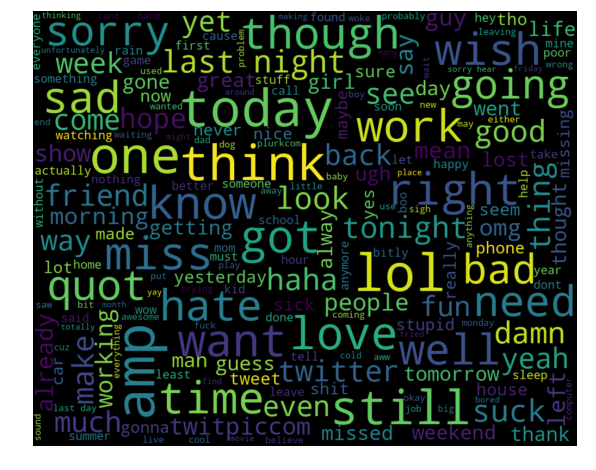

In [0]:
from wordcloud import WordCloud 

st =' '.join([sentence for sentence in twitter_data['processed_SentimentText'][twitter_data['Sentiment'] == 0]])

wordcloud = WordCloud(width=1000, height=800, max_font_size=100).generate(st)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Word cloud for Negative sentiments

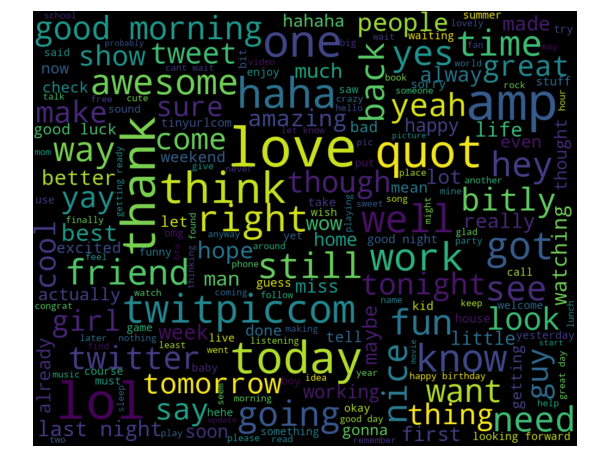

In [0]:
st =' '.join([sentence for sentence in twitter_data['processed_SentimentText'][twitter_data['Sentiment'] == 1]])

wordcloud = WordCloud(width=1000, height=800, max_font_size=100).generate(st)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### 1. From word cloud and other method we are not able to find words which distinguish between positive and negative sentiments 
### 2. This thing is happening because for example if we say 'not good' and 'good' or 'not angry' or 'angry' because of one word our polarity changes and 'not' can be used as positively with 'angry' and negatively with 'good' so 'not' word can present in equal amount in both +ve and -ve sentiments.

In [14]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
negative=[]
neutral=[]
positive=[]
compound=[]
for i in tqdm(twitter_data['processed_SentimentText']):
    negative.append(sid.polarity_scores(i)['neg'])
    neutral.append(sid.polarity_scores(i)['neu'])
    positive.append(sid.polarity_scores(i)['pos'])
    compound.append(sid.polarity_scores(i)['compound'])
twitter_data['negative']=negative
twitter_data['neutral']=neutral
twitter_data['positive']=positive
twitter_data['compound']=compound



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


100%|██████████| 1578612/1578612 [11:13<00:00, 2344.02it/s]


In [15]:
twitter_data

,ItemID,Sentiment,SentimentSource,SentimentText,processed_SentimentText,negative,neutral,positive,compound
0,1,0,Sentiment140,is so sad for my APL frie...,sad apl friend,0.425,0.137,0.438,0.0258
1,2,0,Sentiment140,I missed the New Moon trail...,missed new moon trailer,0.423,0.577,0.000,-0.2960
2,3,1,Sentiment140,omg its already 7:30 :O,omg already,0.000,1.000,0.000,0.0000
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry dentist since suposed ge...,0.237,0.763,0.000,-0.4767
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,think cheating,0.783,0.217,0.000,-0.5574
5,6,0,Sentiment140,or i just worry too much?,worry much,0.744,0.256,0.000,-0.4404
6,7,1,Sentiment140,Juuuuuuuuuuuuuuuuussssst Chillin!!,chillin,0.000,1.000,0.000,0.0000
7,8,0,Sentiment140,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow tonight,0.000,0.588,0.412,0.4215
8,9,1,Sentiment140,handed in my uniform today . i miss you ...,handed uniform today miss already,0.286,0.714,0.000,-0.1531
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-),hmmmm wonder number,0.000,0.606,0.394,0.0772


### Split the data into train and test

In [16]:
from sklearn.model_selection import train_test_split
  
# create design matrix X and target vector y
Xsp = (twitter_data.loc[:, twitter_data.columns != 'Sentiment']) # end index is exclusive
ysp = (twitter_data['Sentiment'] )
print(Xsp.shape)
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(Xsp, ysp, test_size=0.33, stratify=ysp)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.33, stratify=y_1)

(1578612, 8)


In [17]:
print(X_tr.shape, y_tr.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(708638, 8) (708638,)
(349032, 8) (349032,)
(520942, 8) (520942,)


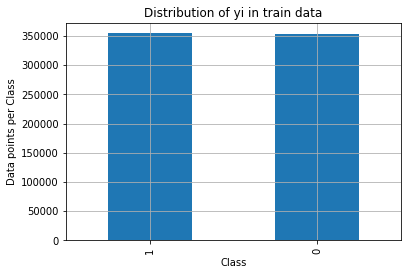

Number of data points in class 1 : 354710 ( 50.055 %)
Number of data points in class 2 : 353928 ( 49.945 %)
--------------------------------------------------------------------------------


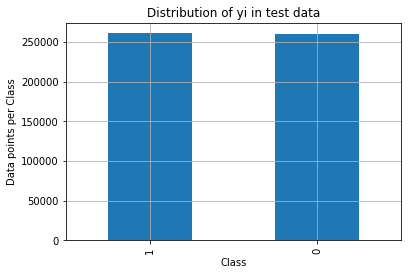

Number of data points in class 1 : 260758 ( 50.055 %)
Number of data points in class 2 : 260184 ( 49.945 %)
--------------------------------------------------------------------------------


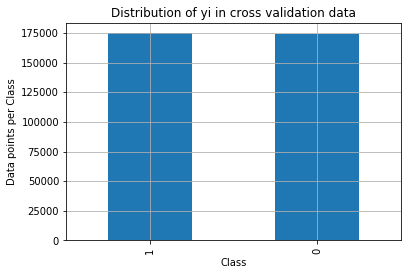

Number of data points in class 1 : 174709 ( 50.055 %)
Number of data points in class 2 : 174323 ( 49.945 %)


In [18]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_tr.value_counts()
test_class_distribution = y_test.value_counts()
cv_class_distribution = y_cv.value_counts()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_tr.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


### Make Data Model Ready

### Bag of words on processed_SentimentText

In [19]:
vectorizer = CountVectorizer(min_df=10)
Train_sentiment= vectorizer.fit_transform(X_tr['processed_SentimentText'])
CV_sentiment=vectorizer.transform(X_cv['processed_SentimentText'])
Test_sentiment=vectorizer.transform(X_test['processed_SentimentText'])
print(Train_sentiment.shape)
print(CV_sentiment.shape)
print(Test_sentiment.shape)
v5=vectorizer
#print(v5.get_feature_names())

(708638, 20966)
(349032, 20966)
(520942, 20966)


### Tfidf on processed_SentimentText

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)
Train_sentiment_tfidf = vectorizer.fit_transform(X_tr['processed_SentimentText'])
CV_sentiment_tfidf = vectorizer.transform(X_cv['processed_SentimentText'])
Test_sentiment_tfidf = vectorizer.transform(X_test['processed_SentimentText'])
print(Train_sentiment_tfidf.shape)
print(CV_sentiment_tfidf.shape)
print(Test_sentiment_tfidf.shape)
vt5=vectorizer

(708638, 21009)
(349032, 21009)
(520942, 21009)


In [35]:
from sklearn.externals import joblib
joblib.dump(vt5, 'tfidf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['tfidf.pkl']

### Word2Vec on processed_SentimentText

In [21]:
i=0
list_of_sentance=[]
for sentnc in tqdm(twitter_data['processed_SentimentText']):
    list_of_sentance.append(sentnc.split())
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=30, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

100%|██████████| 1578612/1578612 [00:06<00:00, 231845.33it/s]


number of words that occured minimum 5 times  56009
sample words  ['sad', 'friend', 'missed', 'new', 'moon', 'trailer', 'omg', 'already', 'sooo', 'gunna', 'cry', 'dentist', 'since', 'suposed', 'get', 'crown', 'put', '30mins', 'think', 'cheating', 'worry', 'much', 'chillin', 'sunny', 'again', 'work', 'tomorrow', 'tonight', 'handed', 'uniform', 'today', 'miss', 'hmmmm', 'wonder', 'number', 'must', 'positive', 'thanks', 'haters', 'face', 'day', '112', '102', 'weekend', 'sucked', 'far', 'isnt', 'showing', 'australia', 'thats']


In [22]:
print(w2v_model.wv.most_similar('teacher'))
print('='*50)
print(w2v_model.wv.most_similar('student'))

[('teachers', 0.8473032116889954), ('spanish', 0.8191297054290771), ('speech', 0.770124077796936), ('english', 0.7543643116950989), ('math', 0.7433331608772278), ('german', 0.7421817779541016), ('lesson', 0.7420730590820312), ('professor', 0.7399985790252686), ('science', 0.7337766885757446), ('student', 0.7301725149154663)]
[('students', 0.9109312295913696), ('education', 0.8706594705581665), ('university', 0.8394321203231812), ('courses', 0.8285565376281738), ('finance', 0.8255401849746704), ('medical', 0.8147055506706238), ('phd', 0.7868836522102356), ('financial', 0.7850071787834167), ('form', 0.7780981659889221), ('banking', 0.7650643587112427)]


In [23]:
def avg_w2v_essays(text):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(text): # for each review/sentence
        vector = np.zeros(30) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in w2v_model:
                vector += w2v_model.wv[word]
                cnt_words += 1
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return(avg_w2v_vectors)
Train_Sentiment_w2v=avg_w2v_essays(X_tr['processed_SentimentText'])
CV_Sentiment_w2v=avg_w2v_essays(X_cv['processed_SentimentText'])
Test_Sentiment_w2v=avg_w2v_essays(X_test['processed_SentimentText'])
print(len(Train_Sentiment_w2v))
print(len(CV_Sentiment_w2v))
print(len(Test_Sentiment_w2v))

100%|██████████| 520942/520942 [00:30<00:00, 17060.22it/s]

708638
349032
520942


### Tfidf weighted word2vec

In [24]:
def essay_tfidf_w2v(text,tfidf_model,dictionary,tfidf_words):
    
    tfidf_model.transform(text)
    
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(text): # for each review/sentence
        vector = np.zeros(30) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in w2v_model) and (word in tfidf_words):
                vec = w2v_model.wv[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return(tfidf_w2v_vectors)
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_tr['processed_SentimentText'])
# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
Train_Sentiment_tfidf_w2v=essay_tfidf_w2v(X_tr['processed_SentimentText'],tfidf_model,dictionary,tfidf_words)
CV_Sentiment_tfidf_w2v=essay_tfidf_w2v(X_cv['processed_SentimentText'],tfidf_model,dictionary,tfidf_words)
Test_Sentiment_tfidf_w2v=essay_tfidf_w2v(X_test['processed_SentimentText'],tfidf_model,dictionary,tfidf_words)
print(len(Train_Sentiment_tfidf_w2v))
print(len(CV_Sentiment_tfidf_w2v))
print(len(Test_Sentiment_tfidf_w2v))

100%|██████████| 520942/520942 [00:54<00:00, 9569.87it/s]

708638
349032
520942


### Positive Sentiments 

In [19]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
Train_e_pos_word = norm.fit_transform(X_tr['positive'].values.reshape(-1, 1))
CV_e_pos_word=norm.transform(X_cv['positive'].values.reshape(-1, 1))                           
Test_e_pos_word=norm.transform(X_test['positive'].values.reshape(-1, 1))                            
print('Training data shape',Train_e_pos_word.shape)
print('cv data shape',CV_e_pos_word.shape)
print('Test data shape',Test_e_pos_word.shape)

Training data shape (708638, 1)
cv data shape (349032, 1)
Test data shape (520942, 1)


### Negative Sentiments

In [20]:
norm = Normalizer()
Train_e_neg_word = norm.fit_transform(X_tr['negative'].values.reshape(-1, 1))
CV_e_neg_word=norm.transform(X_cv['negative'].values.reshape(-1, 1))                           
Test_e_neg_word=norm.transform(X_test['negative'].values.reshape(-1, 1))                            
print('Training data shape',Train_e_neg_word.shape)
print('cv data shape',CV_e_neg_word.shape)
print('Test data shape',Test_e_neg_word.shape)

Training data shape (708638, 1)
cv data shape (349032, 1)
Test data shape (520942, 1)


### Neutral Sentiments

In [21]:
norm = Normalizer()
Train_e_neu_word = norm.fit_transform(X_tr['neutral'].values.reshape(-1, 1))
CV_e_neu_word=norm.transform(X_cv['neutral'].values.reshape(-1, 1))                           
Test_e_neu_word=norm.transform(X_test['neutral'].values.reshape(-1, 1))                            
print('Training data shape',Train_e_neu_word.shape)
print('cv data shape',CV_e_neu_word.shape)
print('Test data shape',Test_e_neu_word.shape)

Training data shape (708638, 1)
cv data shape (349032, 1)
Test data shape (520942, 1)


### Compound sentiments

In [22]:
norm = Normalizer()
Train_e_comp_word = norm.fit_transform(X_tr['compound'].values.reshape(-1, 1))
CV_e_comp_word=norm.transform(X_cv['compound'].values.reshape(-1, 1))                           
Test_e_comp_word=norm.transform(X_test['compound'].values.reshape(-1, 1))                            
print('Training data shape',Train_e_comp_word.shape)
print('cv data shape',CV_e_comp_word.shape)
print('Test data shape',Test_e_comp_word.shape)

Training data shape (708638, 1)
cv data shape (349032, 1)
Test data shape (520942, 1)


In [0]:
import matplotlib.pyplot as plt
from scipy.sparse import hstack
from sklearn.manifold import TSNE
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

### Using only BOW

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

100%|██████████| 5/5 [00:23<00:00,  4.86s/it]


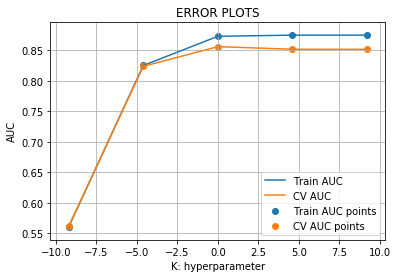

In [33]:


train_auc = []
cv_auc = []
K = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
for i in tqdm(K['C']):
    neigh = LogisticRegression(C=i,penalty='l1')
    neigh.fit(Train_sentiment, y_tr)

    y_train_pred = batch_predict(neigh, Train_sentiment)    
    y_cv_pred = batch_predict(neigh, CV_sentiment)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['C']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=1

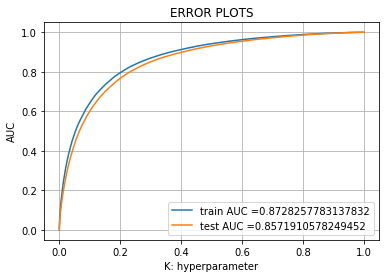

In [36]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C=best_par1,penalty='l1')
neigh.fit(Train_sentiment, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, Train_sentiment)    
y_test_pred = batch_predict(neigh, Test_sentiment)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2499999999920169 for threshold 0.242


Text(33.0, 0.5, 'Actual')

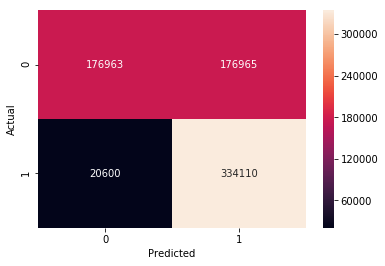

In [38]:
import seaborn as sns
print("Train confusion matrix")
sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Using only Tfidf

100%|██████████| 5/5 [00:31<00:00,  6.78s/it]


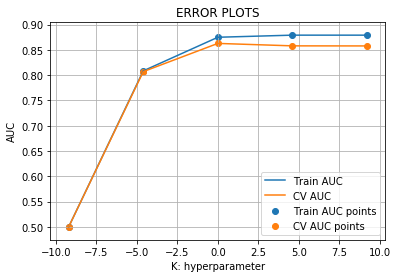

In [39]:


train_auc = []
cv_auc = []
K = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
for i in tqdm(K['C']):
    neigh = LogisticRegression(C=i,penalty='l1')
    neigh.fit(Train_sentiment_tfidf, y_tr)

    y_train_pred = batch_predict(neigh, Train_sentiment_tfidf)    
    y_cv_pred = batch_predict(neigh, CV_sentiment_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['C']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=1

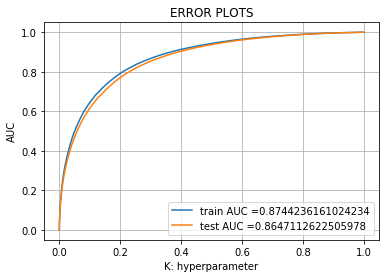

In [39]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C=best_par1,penalty='l1')
neigh.fit(Train_sentiment_tfidf, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, Train_sentiment_tfidf)    
y_test_pred = batch_predict(neigh, Test_sentiment_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [40]:
joblib.dump(neigh, 'tflr.pkl')

['tflr.pkl']

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.237


Text(33.0, 0.5, 'Actual')

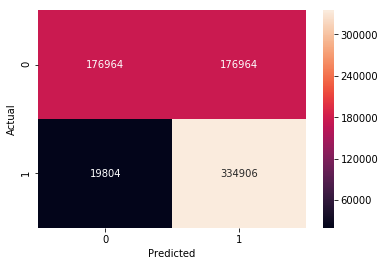

In [42]:
import seaborn as sns
print("Train confusion matrix")
sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Using word2vec

100%|██████████| 5/5 [03:00<00:00, 35.07s/it]


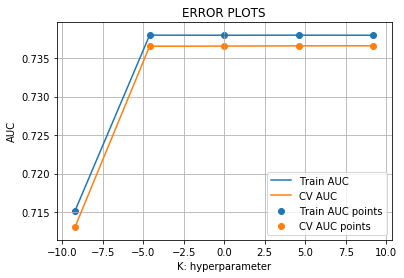

In [46]:

train_auc = []
cv_auc = []
K = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
for i in tqdm(K['C']):
    neigh = LogisticRegression(C=i,penalty='l1')
    neigh.fit(Train_Sentiment_w2v, y_tr)

    y_train_pred = neigh.predict(Train_Sentiment_w2v)    
    y_cv_pred = neigh.predict(CV_Sentiment_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['C']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=0.01

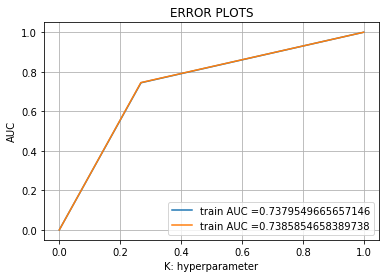

In [50]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C=best_par1,penalty='l1',class_weight='balanced')
neigh.fit(Train_Sentiment_w2v, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict(Train_Sentiment_w2v)    
y_test_pred = neigh.predict(Test_Sentiment_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.19641995720017538 for threshold 1


Text(33.0, 0.5, 'Actual')

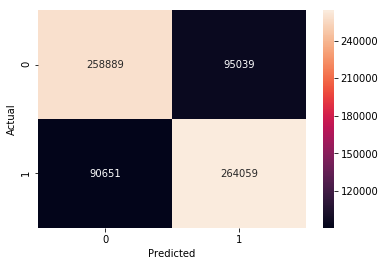

In [51]:
import seaborn as sns
print("Train confusion matrix")
sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Using tfidf weighted w2v

100%|██████████| 4/4 [01:38<00:00, 21.68s/it]


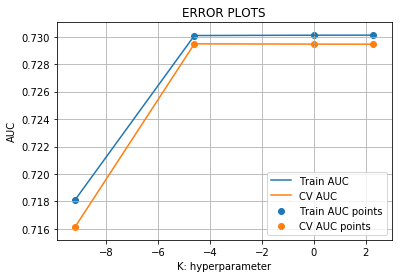

In [56]:

train_auc = []
cv_auc = []
K = {'C': [10**-4, 10**-2, 10**0, 10**1]}
for i in tqdm(K['C']):
    neigh = LogisticRegression(C=i,penalty='l1')
    neigh.fit(Train_Sentiment_tfidf_w2v, y_tr)

    y_train_pred = neigh.predict(Train_Sentiment_tfidf_w2v)    
    y_cv_pred = neigh.predict(CV_Sentiment_tfidf_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['C']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=0.01

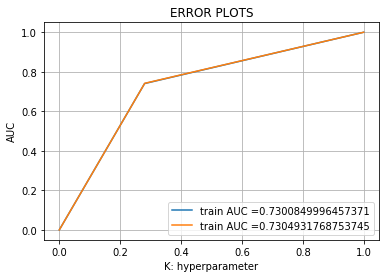

In [57]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C=best_par1,penalty='l1')
neigh.fit(Train_Sentiment_tfidf_w2v, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict( Train_Sentiment_tfidf_w2v)    
y_test_pred = neigh.predict(Test_Sentiment_tfidf_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.20167848807899258 for threshold 1


Text(33.0, 0.5, 'Actual')

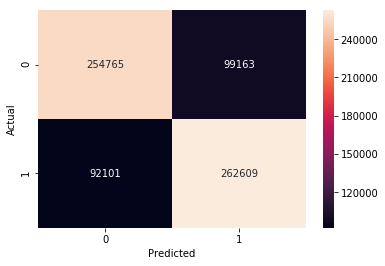

In [59]:
import seaborn as sns
print("Train confusion matrix")
sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### From all the above models LR perform good in Tfidf.

### Using tfidf with sentiments

In [0]:
Xh5 = hstack((Train_sentiment_tfidf,Train_e_pos_word,Train_e_neg_word,Train_e_neu_word,Train_e_comp_word)).tocsr()

Xh5_test=hstack((Test_sentiment_tfidf,Test_e_pos_word,Test_e_neg_word,Test_e_neu_word,Test_e_comp_word)).tocsr()

Xh5_cross=hstack((CV_sentiment_tfidf,CV_e_pos_word,CV_e_neg_word,CV_e_neu_word,CV_e_comp_word)).tocsr()

100%|██████████| 5/5 [02:59<00:00, 37.14s/it]


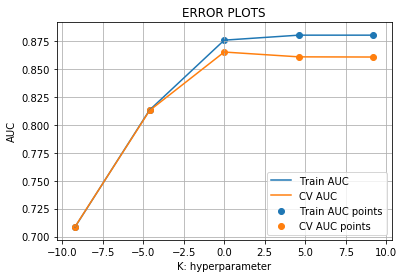

In [28]:


train_auc = []
cv_auc = []
K = {'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}
for i in tqdm(K['C']):
    neigh = LogisticRegression(C=i,penalty='l1')
    neigh.fit(Xh5, y_tr)

    y_train_pred = batch_predict(neigh, Xh5)    
    y_cv_pred = batch_predict(neigh, Xh5_cross)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
log_K=[]
for l in K['C']:
    log_K.append(math.log(l))
plt.plot(log_K, train_auc, label='Train AUC')
plt.plot(log_K, cv_auc, label='CV AUC')

plt.scatter(log_K, train_auc, label='Train AUC points')
plt.scatter(log_K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
best_par1=1

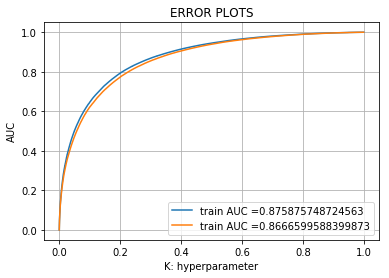

In [30]:
from sklearn.metrics import roc_curve, auc

neigh = LogisticRegression(C=best_par1,penalty='l1',class_weight='balanced')
neigh.fit(Xh5, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, Xh5)    
y_test_pred = batch_predict(neigh, Xh5_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [37]:
import pickle
joblib.dump(neigh, 'lr.pkl')

['lr.pkl']

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999999996806768 for threshold 0.228


Text(33.0, 0.5, 'Actual')

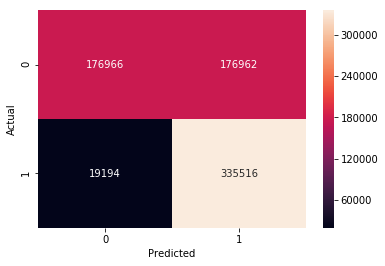

In [0]:
import seaborn as sns
print("Train confusion matrix")
sns.heatmap(confusion_matrix(y_tr, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [88]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model","Vectorizer", "Hyper parameter", "Train AUC","Test AUC"]

x.add_row(["Logistic Regression","BOW", "C=1",0.87282,85719 ])
x.add_row(["Logistic Regression","TFIDF", "C=1",0.87501,0.86423 ])
x.add_row(["Logistic Regression","W2V", "C=0.01",0.73759,0.73758 ])
x.add_row(["Logistic Regression","TFIDF W2V", "C=0.01",0.73008,0.73049 ])
x.add_row(["Logistic Regression","TFIDF W2V + sentiments", "C=1",0.87658,0.86604 ])

print(x)

+---------------------+------------------------+-----------------+-----------+----------+
|        Model        |       Vectorizer       | Hyper parameter | Train AUC | Test AUC |
+---------------------+------------------------+-----------------+-----------+----------+
| Logistic Regression |          BOW           |       C=1       |  0.87282  |  85719   |
| Logistic Regression |         TFIDF          |       C=1       |  0.87501  | 0.86423  |
| Logistic Regression |          W2V           |      C=0.01     |  0.73759  | 0.73758  |
| Logistic Regression |       TFIDF W2V        |      C=0.01     |  0.73008  | 0.73049  |
| Logistic Regression | TFIDF W2V + sentiments |       C=1       |  0.87658  | 0.86604  |
+---------------------+------------------------+-----------------+-----------+----------+


## Conclusion
- We have applied the logistic regression on various vectorizer and observed that Tfidf with sentiments is giving the best results

### Steps for model
- Download the twitter dataset.
- Preprocessed the data.
- Perform EDA and data analysis.
- Prepare data for model by featurization.
- Use Logistic regression on features obtained.
- Check AUC for various model and give the best model.

### Output of model

Negative review

![](negative_review.png)
![](negative.jpg)

Positive review

![](positive_review.jpg)
![](positive.jpg)

### Play with model here
### http://ec2-3-15-204-17.us-east-2.compute.amazonaws.com:8080/index

you can mail me at ankuyadav17@gmail.com if the link doesn't work as i have to start the EC2 instance from the local machine.